 Dimensiunea setului curățat: (35311, 10)

 Exemple de caracteristici extrase:


,Clean Title,Title Length,Has Numbers,Longest Word,Contains Brand
0,apple iphone 8 plus 64gb silver,6,1,6,1
1,apple iphone 8 plus 64 gb spacegrau,7,1,9,1
2,apple mq8n2ba iphone 8 plus 64gb 55 12mp sim f...,13,1,10,1
3,apple iphone 8 plus 64gb space grey,7,1,6,1
4,apple iphone 8 plus gold 55 64gb 4g unlocked s...,11,1,8,1
5,apple iphone 8 plus gold 55 64gb 4g unlocked s...,11,1,8,1
6,apple iphone 8 plus 64 gb space grey,8,1,6,1
7,apple iphone 8 plus 64gb space grey,7,1,6,1
8,apple iphone 8 plus 64gb space grey,7,1,6,1
9,apple iphone 8 plus 64gb space grey,7,1,6,1


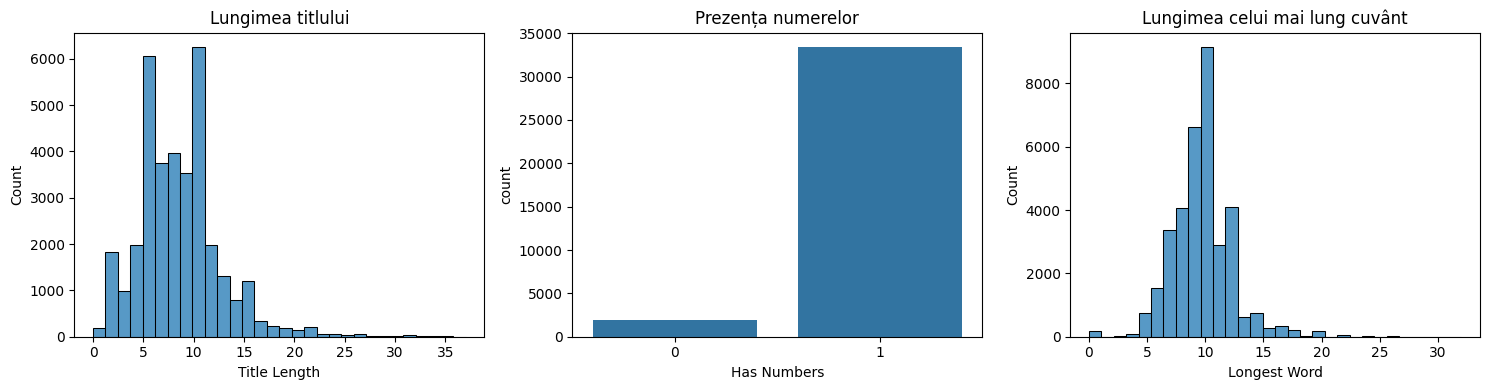

 Setul de date cu caracteristici a fost salvat în: ../data/products_features.csv


In [1]:
# 1. Importarea bibliotecilor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 2. Încărcarea setului de date curățat
df = pd.read_csv('../data/products_clean.csv')
print(" Dimensiunea setului curățat:", df.shape)

# 3. Funcții pentru extragerea caracteristicilor
def has_numbers(text):
    return int(bool(re.search(r'\d', text)))

def has_special_chars(text):
    return int(bool(re.search(r'[^a-zA-Z0-9\s]', text)))

def has_uppercase(text):
    return int(any(char.isupper() for char in text))

def longest_word_length(text):
    words = text.split()
    return max([len(word) for word in words]) if words else 0

def contains_brand(text, brand_list):
    return int(any(brand in text for brand in brand_list))

# 4. Listă de branduri cunoscute (poate fi extinsă)
brands = ['samsung', 'apple', 'bosch', 'kenwood', 'olympus', 'smeg', 'sony', 'lg', 'hp', 'lenovo']

# 🔧 Eliminare valori lipsă din Clean Title
df['Clean Title'] = df['Clean Title'].fillna('')

# 5. Aplicarea funcțiilor
df['Title Length'] = df['Clean Title'].apply(lambda x: len(x.split()))
df['Has Numbers'] = df['Clean Title'].apply(has_numbers)
df['Longest Word'] = df['Clean Title'].apply(longest_word_length)
df['Contains Brand'] = df['Clean Title'].apply(lambda x: contains_brand(x, brands))


# 6. Verificare rezultate
print("\n Exemple de caracteristici extrase:")
display(df[['Clean Title', 'Title Length', 'Has Numbers', 'Longest Word', 'Contains Brand']].head(10))

# 7. Vizualizare distribuții
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Title Length'], bins=30, ax=axs[0])
axs[0].set_title('Lungimea titlului')

sns.countplot(x='Has Numbers', data=df, ax=axs[1])
axs[1].set_title('Prezența numerelor')

sns.histplot(df['Longest Word'], bins=30, ax=axs[2])
axs[2].set_title('Lungimea celui mai lung cuvânt')

plt.tight_layout()
plt.show()

# 8. Salvarea setului îmbogățit
df.to_csv('../data/products_features.csv', index=False)
print(" Setul de date cu caracteristici a fost salvat în: ../data/products_features.csv")
